<a href="https://colab.research.google.com/github/BrendaNahir/Colab/blob/main/Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud    import WordCloud
%matplotlib inline
import matplotlib.cm as cm

from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.decomposition import LatentDirichletAllocation as LDA

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import Normalizer

In [15]:
import spacy

In [16]:
!python -m spacy download es_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 7.6 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
from pprint import pprint

df = pd.read_csv('/content/drive/MyDrive/ArchivosCSV/pericias_medicas.csv', sep=',',  encoding='utf-8')
#convierte en string los datos de la columna text
df1 = df['text'].apply(str)

In [7]:
dfnr= pd.DataFrame(df1)
dfnr

,text
0,\n\nInforma a continuación: \n\nJ.T. 13 \nPER...
1,\n\nJUZG. 40 \n\nPERITO MEDICO PRESENTA INFOR...
2,Expediente Nº CNT 74803/2014 \n \nJUZGADO NACI...
3,JUZGADO NACIONAL DE TRABAJO 59 LAVALLE 1...
4,\n\n \n\nPERITO PRESENTA INFORME \n\n \n\n \n...
...,...
3801,1 \n \n\n21-3-2018 \nTRABAJO Nº 72 \nPRESENTO...
3802,\n\n \n\nJNT Nº 75 – PARANA 520 – 10 ...
3803,\n\nII.- HISTORIA CLINICA \n\n) se dirige a V...
3804,PERITO PSICÓLOGO INFORMA SEGUNDA INCOMPARECENC...


In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopws = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
from nltk import SnowballStemmer
stemmer = SnowballStemmer ('spanish')

In [17]:
nlp= spacy.load('es_core_news_sm')

In [18]:
stop_ws= nlp.Defaults.stop_words
stop_ws

{'a',
 'acuerdo',
 'adelante',
 'ademas',
 'además',
 'afirmó',
 'agregó',
 'ahi',
 'ahora',
 'ahí',
 'al',
 'algo',
 'alguna',
 'algunas',
 'alguno',
 'algunos',
 'algún',
 'alli',
 'allí',
 'alrededor',
 'ambos',
 'ante',
 'anterior',
 'antes',
 'apenas',
 'aproximadamente',
 'aquel',
 'aquella',
 'aquellas',
 'aquello',
 'aquellos',
 'aqui',
 'aquél',
 'aquélla',
 'aquéllas',
 'aquéllos',
 'aquí',
 'arriba',
 'aseguró',
 'asi',
 'así',
 'atras',
 'aun',
 'aunque',
 'añadió',
 'aún',
 'bajo',
 'bastante',
 'bien',
 'breve',
 'buen',
 'buena',
 'buenas',
 'bueno',
 'buenos',
 'cada',
 'casi',
 'cierta',
 'ciertas',
 'cierto',
 'ciertos',
 'cinco',
 'claro',
 'comentó',
 'como',
 'con',
 'conmigo',
 'conocer',
 'conseguimos',
 'conseguir',
 'considera',
 'consideró',
 'consigo',
 'consigue',
 'consiguen',
 'consigues',
 'contigo',
 'contra',
 'creo',
 'cual',
 'cuales',
 'cualquier',
 'cuando',
 'cuanta',
 'cuantas',
 'cuanto',
 'cuantos',
 'cuatro',
 'cuenta',
 'cuál',
 'cuáles',
 'cu

In [19]:
import re
def clean(doc):

  doc = doc.lower().replace('á','a').replace('é','e').replace('í','i').replace('ó','o').replace('ú','u') # removemos minúsculas y tildes
  doc = re.sub('[^a-zA-Z]',' ', doc) #removemos caracteres especiales y numeros.

  doc = [word for word in doc.split(' ') if word not in stop_ws] #removemos stopwords
  doc = ' '.join(doc)
  #doc = [stemmer.stem(word) for word in doc.split(' ')]
  #doc = ' '.join(doc)
  return doc

In [20]:
dfnr['texto_limpio']= dfnr.text.apply(clean)
dfnr.sample(10)

,text,texto_limpio
112,\n\n \n\n \n\nAUTOS: MARTINEZ ELIAS c/ PREVEN...,autos martinez elias c prevencion a...
2063,1 JUZGADO NACIONAL DE PRIMERA INSTANCIA DEL TR...,juzgado nacional instancia trabajo nro s...
144,PERITO MEDICO PRESENTA PERITAJE. \nJUZGADO NAC...,perito medico presenta peritaje juzgado naci...
1567,JUZGADO NACIONAL DE PRIMERA INSTANCIA DEL TRAB...,juzgado nacional instancia trabajo n lav...
3581,JUZGADO DEL TRABAJO N° 71 \nPARANA 520 – PISO ...,juzgado trabajo n parana piso e...
2754,JUZGADO NACIONAL DE PRIMERA INSTANCIA DEL TRAB...,juzgado nacional instancia trabajo nro p...
1905,\n\n \n\n \n\n \n\n \n\n \n\nPERITO MEDICO PR...,perito medico presenta infor...
1152,\n\n \n\n \n\nPERITO PSICÓLOGA \n\nHACE SABE...,perito psicologa suspension entrev...
3318,P4ERITO MEDICO INFORMA ...,p erito medico informa ...
643,PERITO MEDICO PRESENTA INFORME PERICIAL \nJUST...,perito medico presenta informe pericial justi...


In [52]:
dfnr.texto_limpio[0]

'   informa continuacion    j t      perito medico presenta informe pericial    autos   boiero franco ivan c swiss medical art s    s accidente   ley especial   expediente n                  i proemio     sr  juez nacional     hortas  maria andrea  s   perito  medico   oficio    siguientes  autos  domicilio constituido calle austria         piso dpto      capital z      tel             domicilio electronico mashortas hotmail com                  cumplimiento dispuesto v s  referente presentes autos      examinado        boiero  franco  ivan    tomaron    momento   examen    clinico  actual   consideraron     capacidad generica particular puntos pericia solicitados partes  v s          ii antecedentes interes medico legal   foja   inicia demanda  foja   vta  hechos accidente in itinere refiere    setiembre           h encontraba camino trabajo cruzar calle piso piedra  pie izquierdo queda trabado girando cuerpo sufriendo entorsis  tobillo izquierdo consecuencia fuerte dolor aviso  emple

In [17]:
!pip install spacy==2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:




from spacy.lemmatizer import Lemmatizer
from spacy.lookups import Lookups
def lematize(tok):
  lookups = Lookups()
  lookups.add_table("lemma_rules", {"noun": [["s", ""]]})
  lemmatizer = Lemmatizer(lookups)

  if tok.pos_== 'VERB':
    tok= tok.lemma_
  elif tok.pos_=='NOUN':
    tok = lemmatizer(tok.text, tok.pos_)[0]
  else:
    tok
  return tok

In [22]:
lemm = []
for sent in dfnr.texto_limpio:
    tokens = nlp(sent)
    lem= [lematize(tok)for tok in tokens]
    lem = ' '.join(tok.text for tok in tokens)
    lemm.append(lem)

#### Vectorización

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvectorizer = TfidfVectorizer( stop_words=stop_ws ,max_df=0.90, min_df=3, ngram_range=(1,1))
Xtf = tfvectorizer.fit_transform(lemm)

In [24]:
Xtf.shape

(3806, 33650)

In [25]:
## reduccion de dimensionalidad : quitamos outliers? (valores atipicos)
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=30, algorithm='randomized', random_state=12)
normalizer = Normalizer(copy=False) # kmeans de sklearn no tiene dist coseno
lsa = make_pipeline(svd, normalizer)

X1 = lsa.fit_transform(Xtf)

#### Análisis de clusters: KMeans

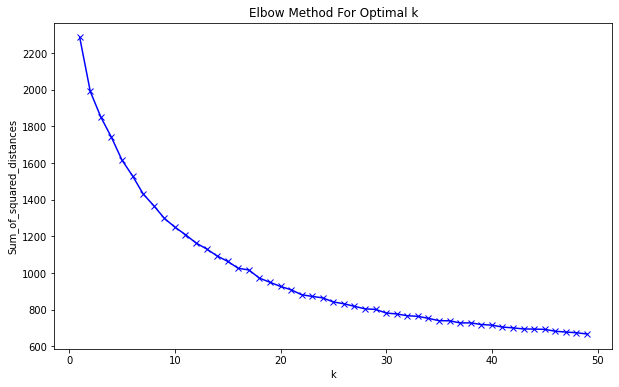

In [26]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, verbose=False, random_state=12, algorithm = 'full')
    km = km.fit(X1)
    Sum_of_squared_distances.append(km.inertia_)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sumas de distancias al cuadrado')
plt.title('Método del codo para k óptimo')
plt.savefig('elbowmethod.jpg')
plt.show()

In [27]:
km_clust = KMeans(n_clusters=30, init='k-means++', n_init=10, verbose=False, random_state=12)
km_clust.fit(X1)
dfnr['label']= km_clust.labels_
dfnr

,text,texto_limpio,label
0,\n\nInforma a continuación: \n\nJ.T. 13 \nPER...,informa continuacion j t perito med...,17
1,\n\nJUZG. 40 \n\nPERITO MEDICO PRESENTA INFOR...,juzg perito medico presenta informe m...,14
2,Expediente Nº CNT 74803/2014 \n \nJUZGADO NACI...,expediente n cnt juzgado nacion...,24
3,JUZGADO NACIONAL DE TRABAJO 59 LAVALLE 1...,juzgado nacional trabajo lavalle ...,14
4,\n\n \n\nPERITO PRESENTA INFORME \n\n \n\n \n...,perito presenta informe ...,23
...,...,...,...
3801,1 \n \n\n21-3-2018 \nTRABAJO Nº 72 \nPRESENTO...,trabajo n presento peri...,8
3802,\n\n \n\nJNT Nº 75 – PARANA 520 – 10 ...,jnt n parana p...,17
3803,\n\nII.- HISTORIA CLINICA \n\n) se dirige a V...,ii historia clinica dirige v s respet...,13
3804,PERITO PSICÓLOGO INFORMA SEGUNDA INCOMPARECENC...,perito psicologo informa incomparecencia j...,3


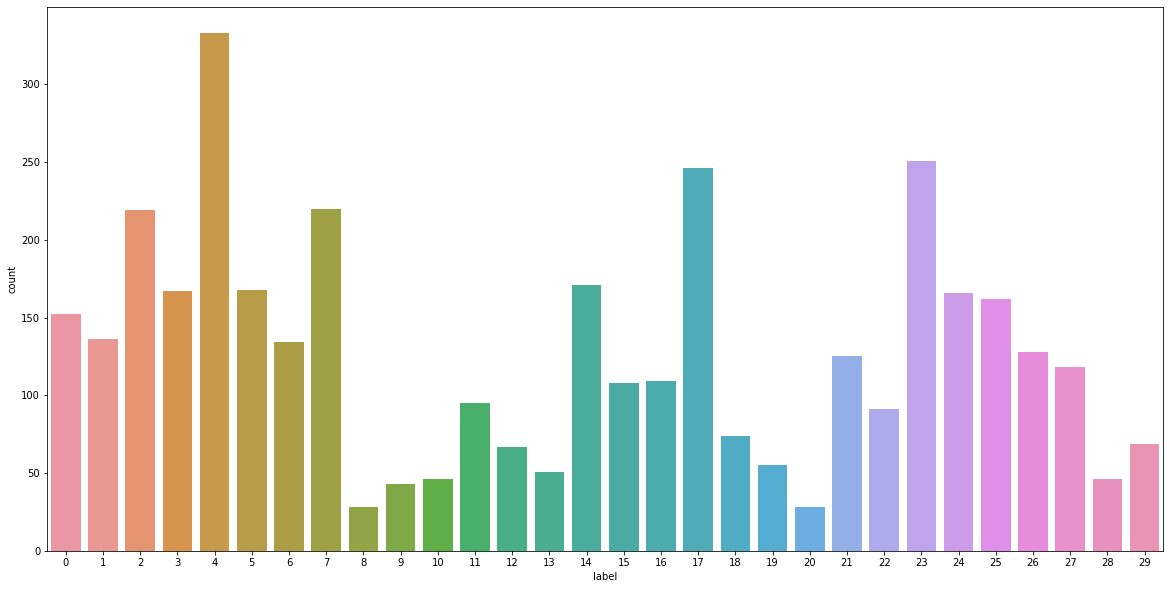

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(x= 'label', data=dfnr)
plt.savefig('cluster_frec_kmeans.jpg')

In [31]:
k=km_clust.n_clusters
BOLD = '\033[1m'
END = '\033[0m'
for i in range(k):

  print (BOLD+'\n Frases del Cluster {}\n'.format(i)+END,end='\n')
  print (dfnr[dfnr.label==i].texto_limpio[0:10])


 Frases del Cluster 0

24     peritacion medica or juez   juzgado trabajo n ...
31     perito  medico  presenta  peritacion     sebas...
73      autos  caratulados              perito medica...
80     juzgado nacional    instancia trabajo n       ...
106          informe medico   pericial oficio   sr   ...
154    perito medico legista presenta informe pericia...
185                                           rst   j...
210    juzgado laboral   n      expediente      n    ...
232    juzgado nacional   instancia trabajo n      si...
242           tribunal trabajo n       presentacion i...
Name: texto_limpio, dtype: object

 Frases del Cluster 1

13     juzg  nac  trabajo n                          ...
17     perito medico presenta informe pericial   juzg...
21     t    sarmiento        p   pericial medica  cum...
44     juzgado nacional trabajo n      diagonal roque...
57                   informe medico  pericial oficio ...
72                                     or juez    per...
85    

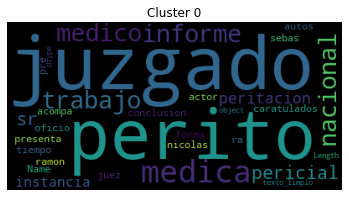

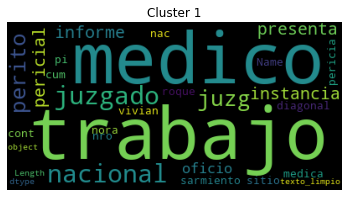

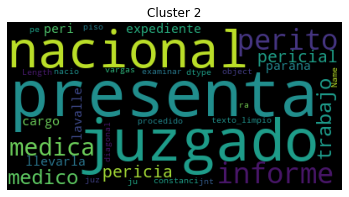

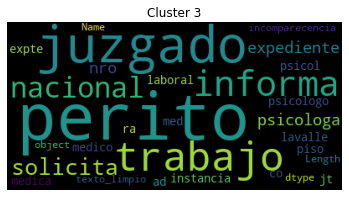

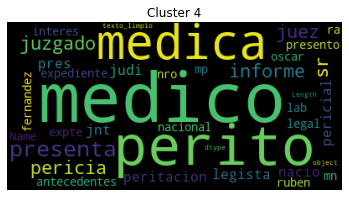

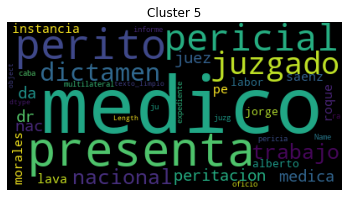

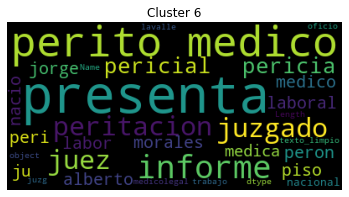

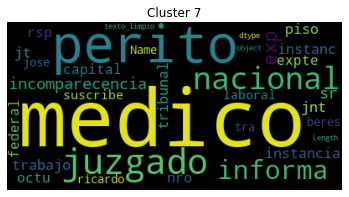

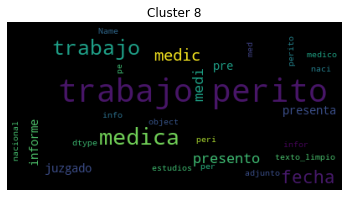

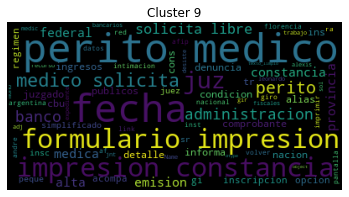

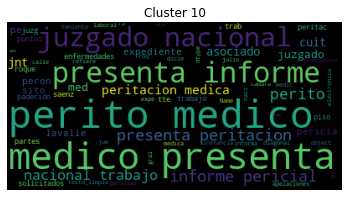

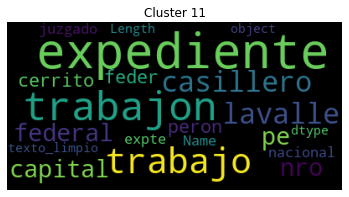

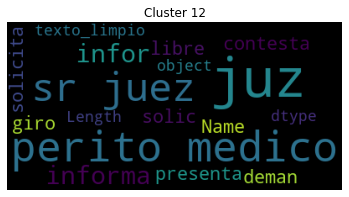

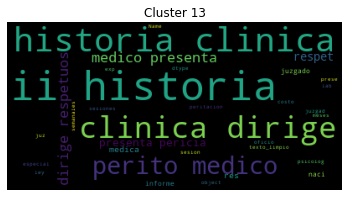

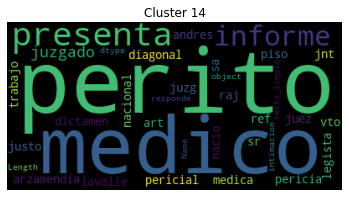

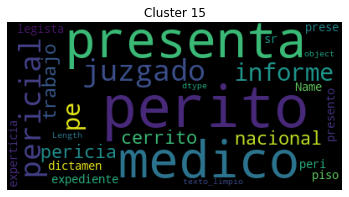

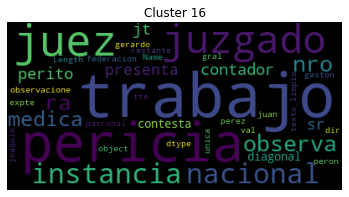

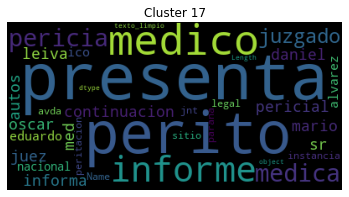

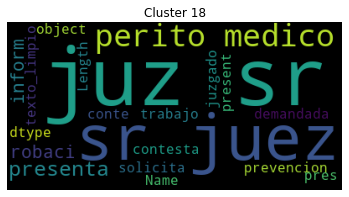

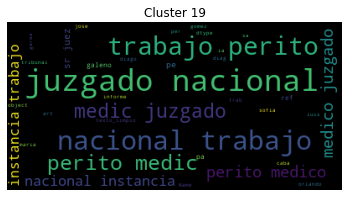

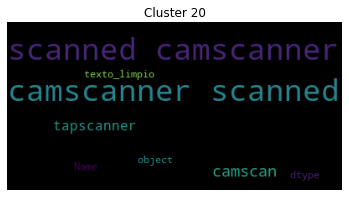

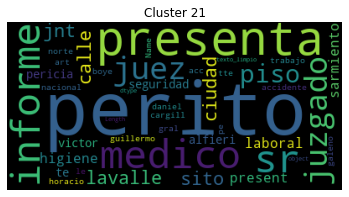

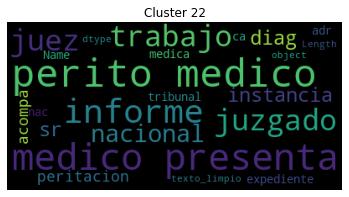

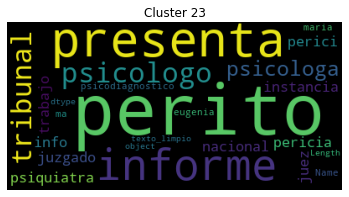

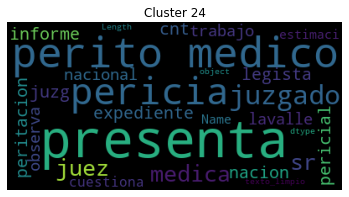

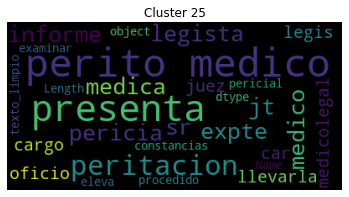

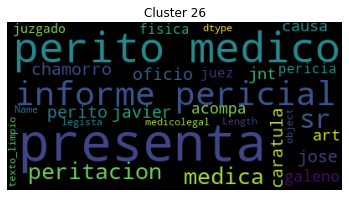

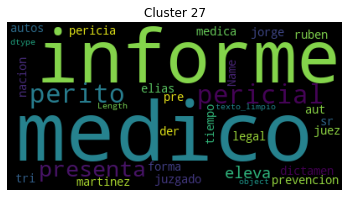

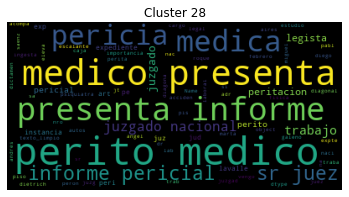

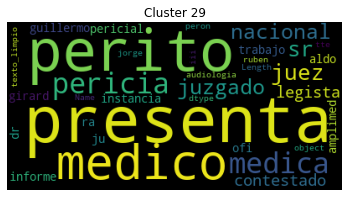

In [32]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud().generate(str(data))
    fig = plt.figure(1, figsize=(6, 6))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

#show_wordcloud(dfnr[dfnr.label==5].clean)

for i in range(km_clust.n_clusters):
  

  plt.title('Cluster {}'.format(i))

  show_wordcloud(dfnr[dfnr.label==i].texto_limpio)

#### Latent Dirichlet Allocation

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, stop_words=stop_ws, ngram_range=(1,2), min_df=3)
tf = tf_vectorizer.fit_transform(lemm)
tf_feature_names = tf_vectorizer.get_feature_names()
tf.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(3806, 254852)

In [34]:
lda = LDA(n_components=30, max_iter=15, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda.components_.shape

(30, 254852)

In [35]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [36]:
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, 5)


Topics in LDA model:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic #0: constancia sujeto inscripcion presente peritado
Topic #1: padece accionante malena presentarse comisiones ocasion presentarse medicas aporta
Topic #2: editorial trabajo grados grados grados forense
Topic #3: dolor medico examen columna actor
Topic #4: incapacidad rodilla actor derecha rodilla derecha
Topic #5: tecnicas casa indicadores psicologico peritado
Topic #6: medico art perito medico ley accidente
Topic #7: respondo abaco edicion defilipi defilipi novoa
Topic #8: silvina cuervo andrea andrea silvina silvina cuervo
Topic #9: remito informe inguinal pericial punto hernia inguinal grados
Topic #10: actor medico presenta accidente examen
Topic #11: medico presenta actor informe incapacidad
Topic #12: cid cid cid fecha normal informe pericial
Topic #13: fecha art trabajo riesgos seguridad
Topic #14: alias cbu alias banco santander santander sucursal
Topic #15: alteraciones presenta alteraciones examen actual antecedentes examen presenta antecedentes
Topic #16: actor examen 

In [38]:
doc_topic = lda.transform(tf)
lda_labels = [doc_topic[i].argmax() for i in range(doc_topic.shape[0])]
dfnr['lda'] = lda_labels
doc_topic.shape

(3806, 30)

In [40]:
BOLD = '\033[1m'
END = '\033[0m'
for i in range(doc_topic.shape[1]):

  print (BOLD+'\n Frases del Cluster {}\n'.format(i)+END,end='\n')
  print (dfnr[dfnr.lda==i].texto_limpio[0:10])


 Frases del Cluster 0

33      juz t        perito medico solicita libre giro...
148                formulario impresion constancia ins...
666                                                   ...
865                                                   ...
887     perito medica denuncia  afip    juzgado nacion...
892                                                   ...
976                                                   ...
1056                                                  ...
1066    administracion federal ingresos publicos  cons...
1160    j z g d   n c i n l   d l   t r b j   n       ...
Name: texto_limpio, dtype: object

 Frases del Cluster 1

Series([], Name: texto_limpio, dtype: object)

 Frases del Cluster 2

116    caratula  chamorro  jose javier c  galeno art ...
866    autos  insauralde ortigoza  alberto dario c  g...
Name: texto_limpio, dtype: object

 Frases del Cluster 3

1        juzg       perito medico presenta informe m...
13    juzg  nac  trabajo n              

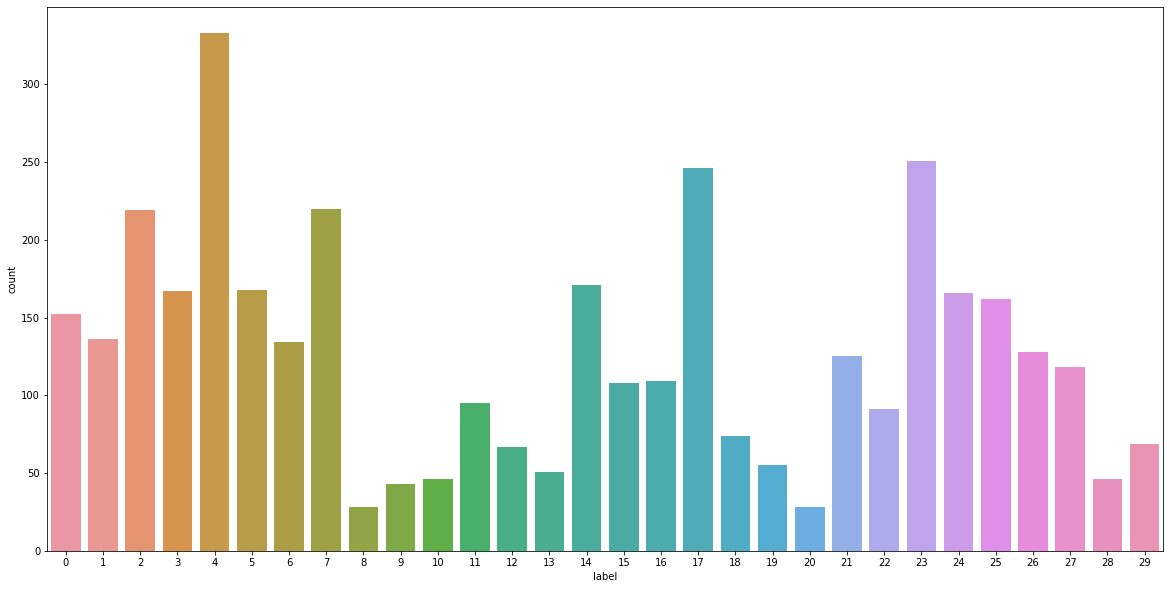

In [41]:
plt.figure(figsize=(20,10))
sns.countplot(x= 'label', data=dfnr)
plt.savefig('frecs_kmeans.jpg')

Reduccion de dimensionalidad: tSNE

In [42]:
lda.components_.shape

(30, 254852)

In [43]:
from sklearn.manifold import TSNE
def plot_tsne(model, label):
  X_tsne = TSNE(n_components=2).fit_transform(model)
  tsne_df = pd.DataFrame({'X':X_tsne[:,0],
                          'Y':X_tsne[:,1],
                          'Z':label})
  plt.figure(figsize=(20,10))
  sns.scatterplot(x="X", y="Y",
                hue='Z',
                palette= 'bright',
                legend='full',
                data=tsne_df);

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


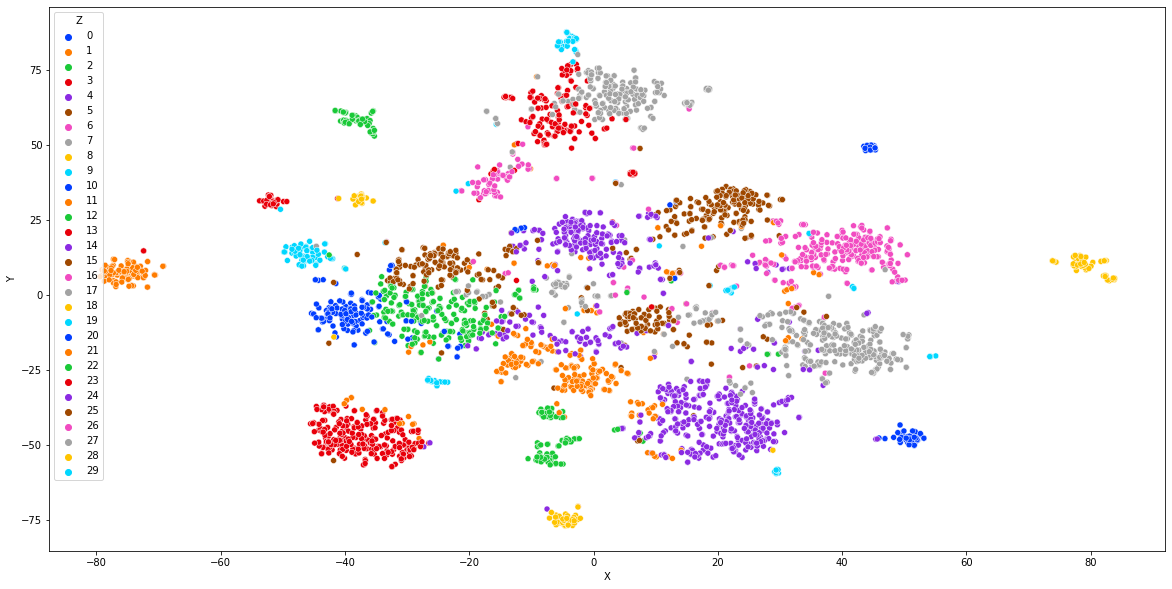

In [44]:
plot_tsne(X1, dfnr.label)# hacemos reduccion de dimensionalidad del modelo de k-means

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


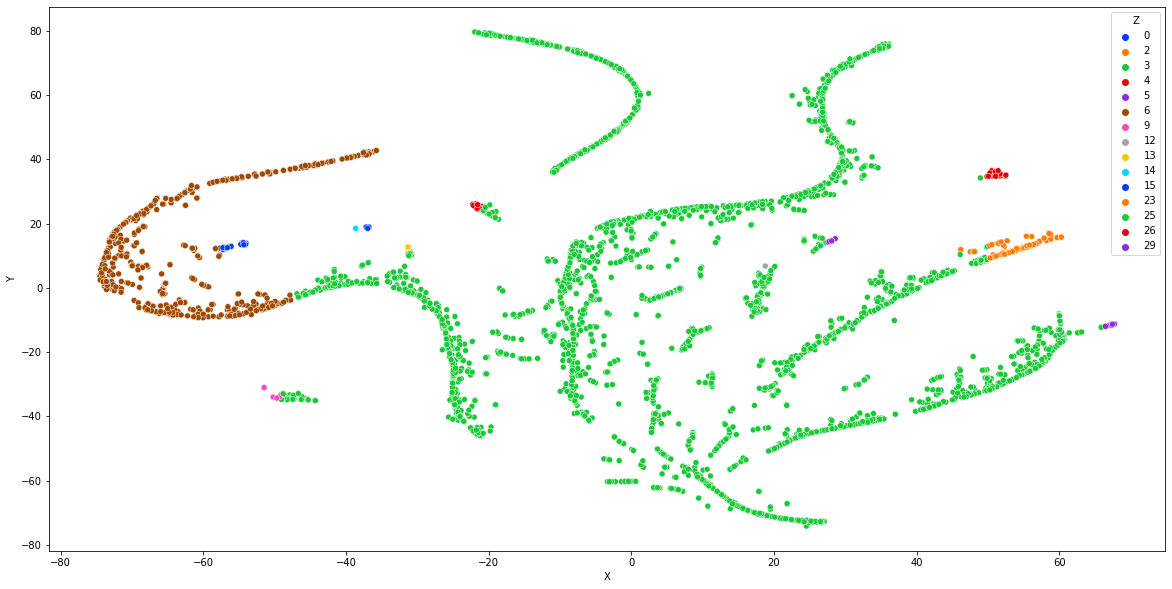

In [45]:
plot_tsne(doc_topic, dfnr.lda)# hacemos reduccion de dimensionalidad de LDA

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


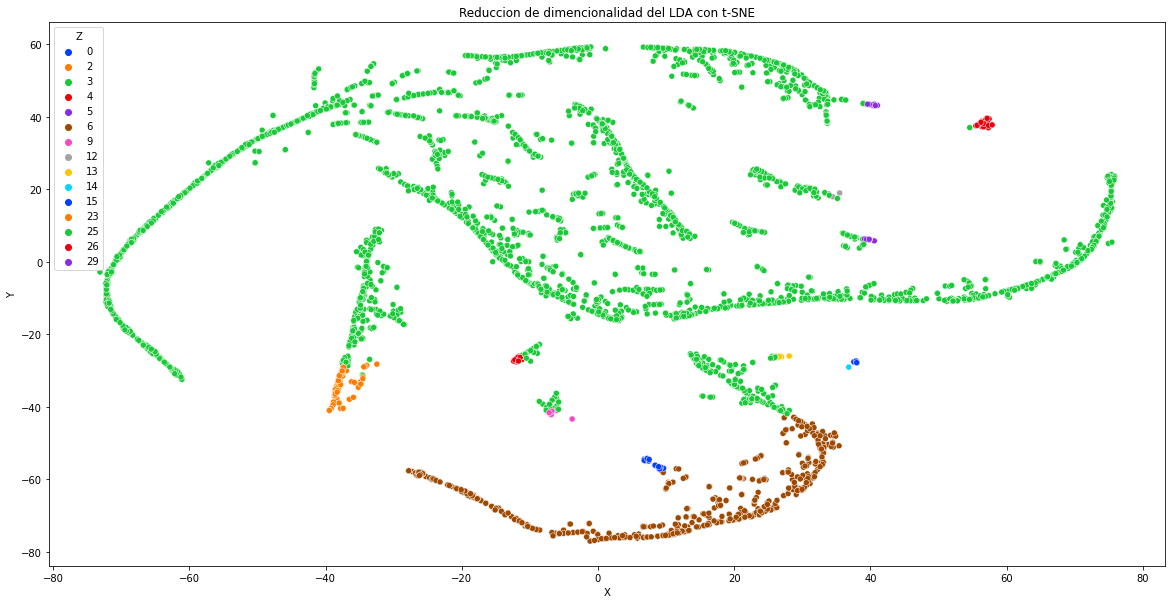

In [46]:
X_tsne = TSNE(n_components=2, perplexity=30).fit_transform(doc_topic)
tsne_df = pd.DataFrame({'X':X_tsne[:,0],
                          'Y':X_tsne[:,1],
                          'Z':dfnr.lda})
plt.figure(figsize=(20,10))
sns.scatterplot(x="X", y="Y",
              hue='Z',
              palette= 'bright',
              legend='full',
              data=tsne_df);
plt.title('Reduccion de dimensionalidad del LDA con t-SNE')
plt.savefig('lda_tsne.jpg')

#### Embeddings pre-entrenados: Word2Vec

In [47]:
import gensim
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import Doc2Vec

In [48]:
########################
LabeledSentence1 = gensim.models.doc2vec.TaggedDocument
all_content_train = []
j=0
for em in lemm:
    all_content_train.append(LabeledSentence1(em,[j]))
    j+=1
print("Number of texts processed: ", j)

Number of texts processed:  3806


In [49]:
d2v_model = Doc2Vec(all_content_train, vector_size = 100, window = 10, min_count = 5, workers=7, dm = 1,alpha=0.025, min_alpha=0.001)
d2v_model.train(all_content_train, total_examples=d2v_model.corpus_count, epochs=10, start_alpha=0.002, end_alpha=-0.016)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


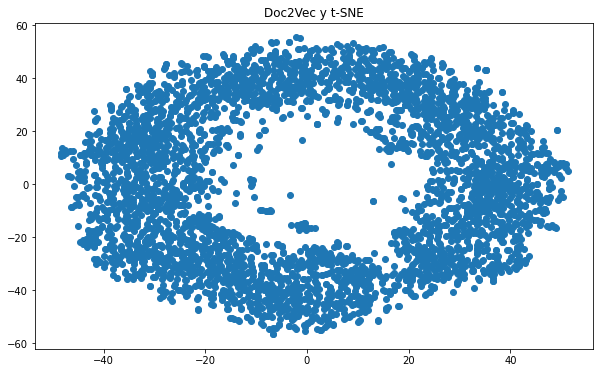

In [50]:
kmeans_model = KMeans(n_clusters=4, init="k-means++", max_iter=100) 
Xsvd = TruncatedSVD(n_components=30).fit(d2v_model.docvecs.vectors_docs)
Xsvd = Xsvd.transform(d2v_model.docvecs.vectors_docs)
X = kmeans_model.fit(Xsvd)
labels=kmeans_model.labels_.tolist()
l = kmeans_model.fit_predict(Xsvd)
pca = TSNE(n_components=2).fit(Xsvd)
datapoint = pca.fit_transform(Xsvd)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.figure
#label1 = ["#FFFF00", "#008000", "#0000FF", "#800080"]
#color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1])
#centroids = kmeans_model.cluster_centers_
#centroidpoint = pca.transform(centroids)
#plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker="^", s=150, c="#000000")

plt.title('Doc2Vec y t-SNE')
plt.savefig('d2v_tsne.jpg')
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

vectorizertfidf = TfidfVectorizer(max_df=0.90, min_df=2, stop_words=stop_ws)
tfidf = vectorizertfidf.fit_transform(dfnr.texto_limpio)
tfidf_featurenames = vectorizertfidf.get_feature_names()
print("Nro de filas/documentos: %s  \nNro de columnas/tokens %s" % tfidf.toarray().shape)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Nro de filas/documentos: 3806  
Nro de columnas/tokens 42650


In [25]:
tfvectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words=stopws)
tf = tfvectorizer.fit_transform(dfnr.texto_limpio)
tf_featurenames = tfvectorizer.get_feature_names()
print("Nro de filas/documentos: %s  \nNro de columnas/tokens %s" % tf.toarray().shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Nro de filas/documentos: 3806  
Nro de columnas/tokens 42606


In [26]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print()

        
no_topics = 20

# Run NMF
nmf = NMF(n_components=no_topics, random_state=12, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', 
                                learning_offset=50., random_state=12).fit(tf)

no_top_words = 5

display_topics(nmf, tfidf_featurenames, no_top_words)
display_topics(lda, tf_featurenames, no_top_words)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


Topic 0:
actor presenta incapacidad examen informe
Topic 1:
robacio carlos juan juancarobacio cabildo
Topic 2:
rodilla menisco derecha izquierda interno
Topic 3:
columna lumbar cervical disco dolor
Topic 4:
dedo mano pulgar interfalangica falange
Topic 5:
tobillo pie derecho izquierdo esguince
Topic 6:
remito informe actor punto particularidad
Topic 7:
hombro manguito supraespinoso elevacion derecho
Topic 8:
scanned camscanner by with zygapophyseal
Topic 9:
medico informa nacional legista medica
Topic 10:
eca mu mano izquierda cubital
Topic 11:
canciani victoria alicia avcanciani cabildo
Topic 12:
rta respondido consignado apartado desprende
Topic 13:
respuesta pregunta remito incapacidad caso
Topic 14:
rta respondido pta actor lesiones
Topic 15:
presenta graduada transcriptos prueba obrero
Topic 16:
inscripcion constancia impuesto ganancias afip
Topic 17:
informado remito parrafos efectuado digitales
Topic 18:
fs medico examen legales remitirse
Topic 19:
inguinal hernia abdominal hern

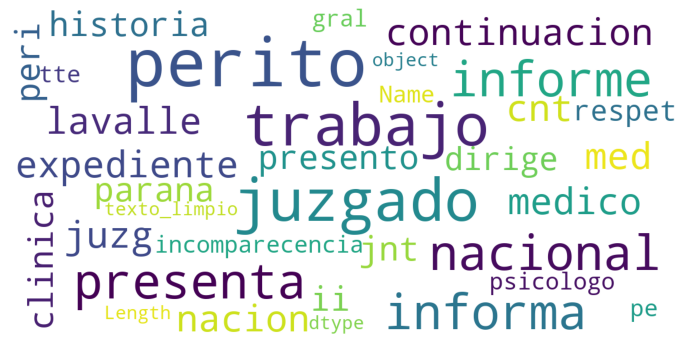

In [27]:
stopws = set(stopwords.words('spanish'))

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopws,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(dfnr.texto_limpio)